<a href="https://colab.research.google.com/github/bluedataconsulting/Orbit-AI-Mastery-TTT-/blob/main/Module9/Autoencoder_for_dimensionality_reduction_and_image_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders for Image compression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models,layers

## Data Preparation

In [2]:
#load the MNIST dataset
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
print(xtrain.shape)
print(xtest.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
xtrain = xtrain/255
xtest = xtest/255

In [4]:
print(xtrain.shape)
print(xtest.shape)
xtrain = xtrain.reshape(60000,28*28)
xtest = xtest.reshape(10000,28*28)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


## Modelling

In [5]:
# Encoder
input_layer = layers.Input(shape=(784,))
dense1 = layers.Dense(128,activation='relu')(input_layer)

dense2 = layers.Dense(64,activation='relu')(dense1)

# Decoder 
dense3 = layers.Dense(128,activation='relu')(dense2)
output_layer = layers.Dense(784,activation='sigmoid')(dense3)
model = models.Model(input_layer,output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(xtrain,xtrain,epochs=30,batch_size=128,shuffle=True,validation_data=(xtest,xtest))

Epoch 1/30
469/469 [==============================] - 5s 6ms/step - loss: 0.1793 - accuracy: 0.0105 - val_loss: 0.1178 - val_accuracy: 0.0126
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1080 - accuracy: 0.0116 - val_loss: 0.0990 - val_accuracy: 0.0117
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0962 - accuracy: 0.0122 - val_loss: 0.0915 - val_accuracy: 0.0148
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0905 - accuracy: 0.0143 - val_loss: 0.0873 - val_accuracy: 0.0139
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0873 - accuracy: 0.0141 - val_loss: 0.0851 - val_accuracy: 0.0142
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0850 - accuracy: 0.0140 - val_loss: 0.0829 - val_accuracy: 0.0140
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0832 - accuracy: 0.0138 - val_loss: 0.0814 - val_accuracy: 0.0129
Epoch 

In [7]:
encoder = models.Model(input_layer,dense2)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________


In [8]:
encodop = encoder.predict(xtest)
print(encodop.shape)
prediction = model.predict(xtest)
print(prediction.shape)

(10000, 64)
(10000, 784)


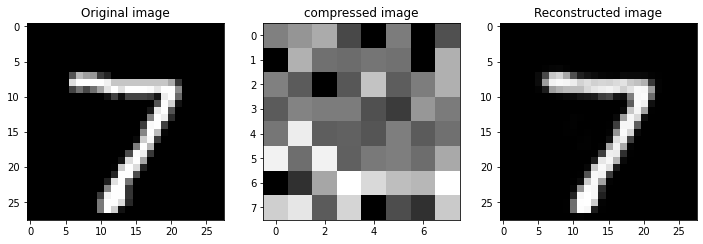

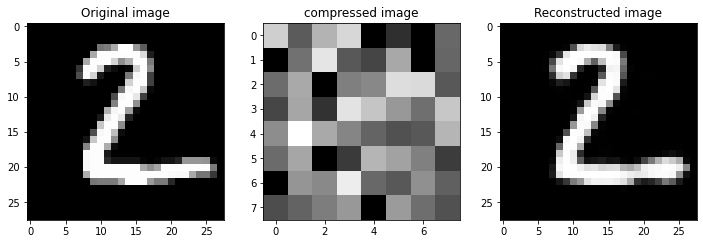

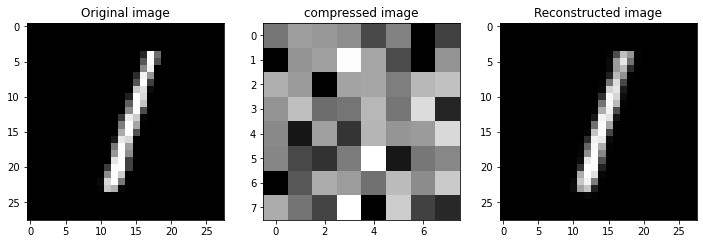

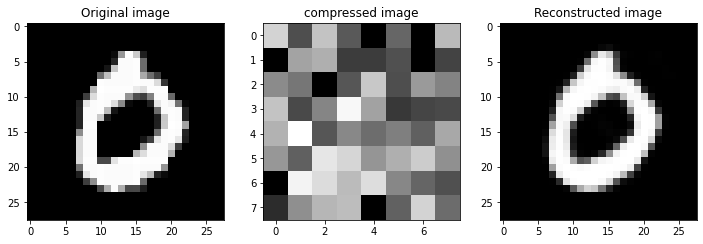

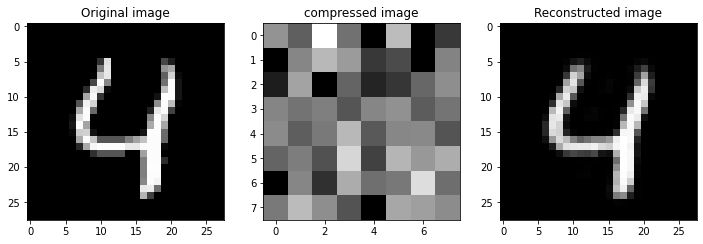

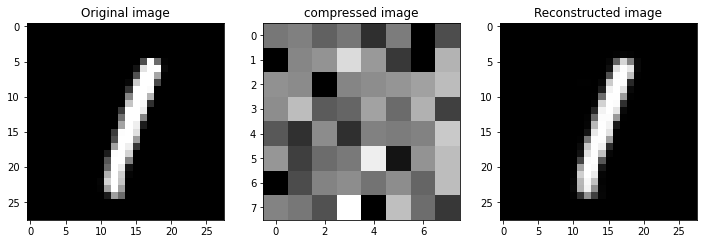

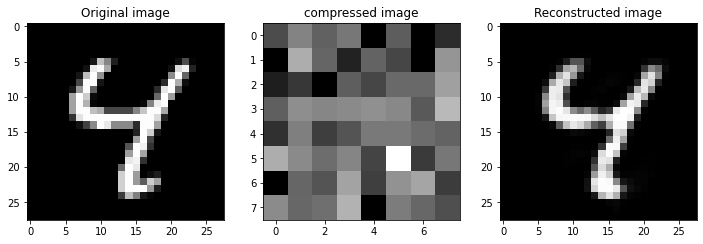

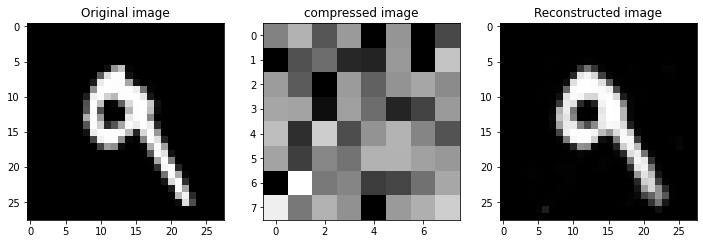

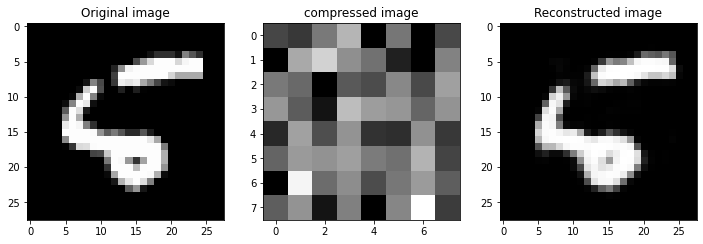

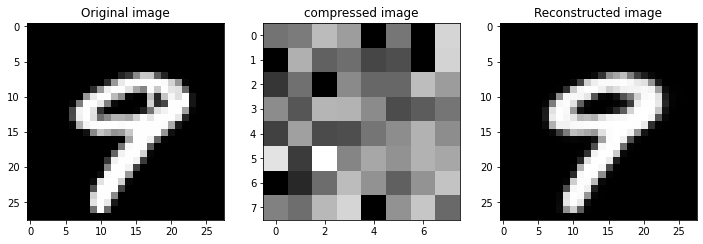

In [9]:
n = 10
for i in range(n):
  plt.figure(figsize=(12,4))
  plt.subplot(131)
  plt.title("Original image")
  plt.imshow(xtest[i].reshape(28,28),cmap='gray')
  plt.subplot(132)
  plt.title("compressed image")
  plt.imshow(encodop[i].reshape(8,8),cmap='gray')
  plt.subplot(133)
  plt.title("Reconstructed image")
  plt.imshow(prediction[i].reshape(28,28),cmap='gray')
  plt.show()
  


# Autoencoders for denoising images

In [10]:
#load the MNIST dataset
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()
#scaling the images
xtrain = (xtrain - 127.5) / 127.5
xtest = (xtest - 127.5) / 127.5
# reshaping images to channel format - samples,row,cols,channels
xtrain = xtrain.reshape(60000,28,28,1)
xtest = xtest.reshape(10000,28,28,1)
print(xtrain.shape)
print(xtest.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
input_layer = layers.Input(shape=(28,28,1))
c1 = layers.Conv2D(16,(3,3),activation='relu',padding='same',strides=(2,2))(input_layer)
c2 = layers.Conv2D(8,(3,3),activation='relu',padding='same',strides=(2,2))(c1)

c3 = layers.Conv2DTranspose(8,(3,3),activation='relu',padding='same',strides=(2,2))(c2)
c4 = layers.Conv2DTranspose(16,(3,3),activation='relu',padding='same',strides=(2,2))(c3)
output_layer = layers.Conv2D(1,(3,3),activation='tanh',padding='same')(c4)

model = models.Model(input_layer,output_layer)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 8)        584       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       1168      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145 

In [12]:
from tensorflow.keras import losses
model.compile(optimizer='adam',loss=losses.MeanSquaredError())

In [13]:
import tensorflow as tf
noise_factor = 0.4
xtrain_noisy = xtrain + noise_factor * tf.random.normal(shape=xtrain.shape)
xtest_noisy = xtest + noise_factor * tf.random.normal(shape=xtest.shape)

xtrain_noisy = tf.clip_by_value(xtrain_noisy,-1.0,1.0) 
xtest_noisy = tf.clip_by_value(xtest_noisy,-1.0,1.0)

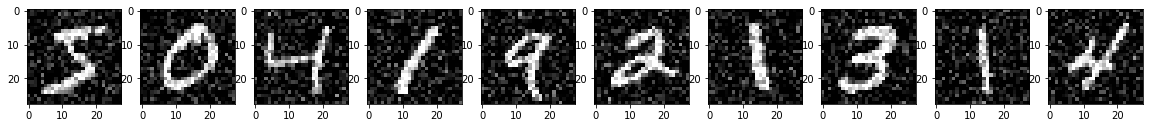

In [14]:
n=10
plt.figure(figsize=(20,3))
for i in range(n):
  plt.subplot(1,n,i+1)
  plt.imshow(tf.squeeze(xtrain_noisy[i]),cmap='gray')
plt.show()

In [15]:
model.fit(xtrain_noisy,xtrain,epochs=20,batch_size=1000,shuffle=True,validation_data=(xtest_noisy,xtest))

Epoch 1/20
60/60 [==============================] - 12s 50ms/step - loss: 0.4928 - val_loss: 0.2959
Epoch 2/20
60/60 [==============================] - 3s 46ms/step - loss: 0.2149 - val_loss: 0.1632
Epoch 3/20
60/60 [==============================] - 3s 46ms/step - loss: 0.1217 - val_loss: 0.0799
Epoch 4/20
60/60 [==============================] - 3s 46ms/step - loss: 0.0622 - val_loss: 0.0482
Epoch 5/20
60/60 [==============================] - 3s 46ms/step - loss: 0.0420 - val_loss: 0.0352
Epoch 6/20
60/60 [==============================] - 3s 46ms/step - loss: 0.0325 - val_loss: 0.0289
Epoch 7/20
60/60 [==============================] - 3s 45ms/step - loss: 0.0276 - val_loss: 0.0253
Epoch 8/20
60/60 [==============================] - 3s 44ms/step - loss: 0.0248 - val_loss: 0.0232
Epoch 9/20
60/60 [==============================] - 3s 44ms/step - loss: 0.0229 - val_loss: 0.0216
Epoch 10/20
60/60 [==============================] - 3s 47ms/step - loss: 0.0216 - val_loss: 0.0205
Epoch 11

In [16]:
prediction = model.predict(xtest_noisy)
prediction.shape

(10000, 28, 28, 1)

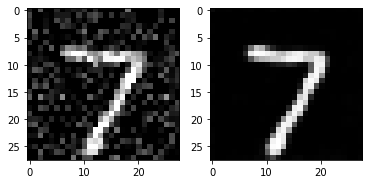

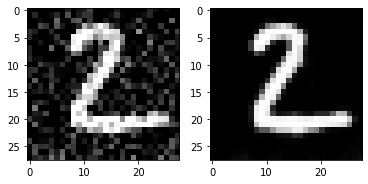

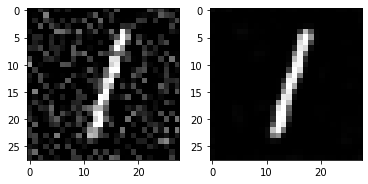

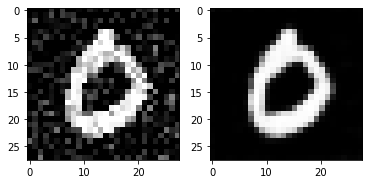

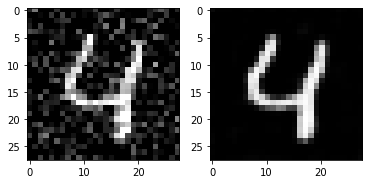

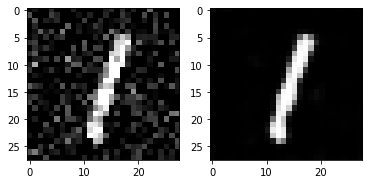

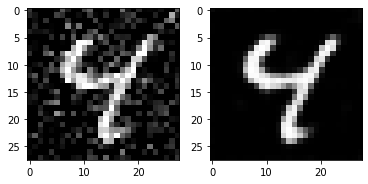

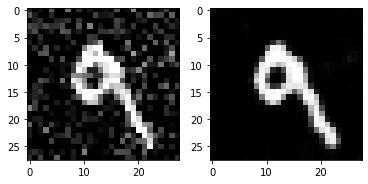

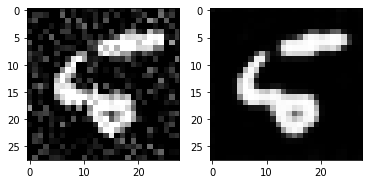

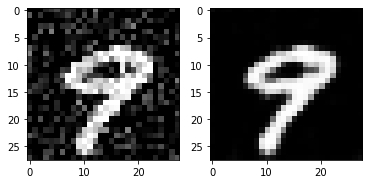

In [17]:
n = 10
for i in range(10):
  plt.subplot(121)
  plt.imshow(tf.squeeze(xtest_noisy[i]),cmap='gray')
  plt.subplot(122)
  plt.imshow(prediction[i].reshape(28,28),cmap='gray')
  plt.show()